<a href="https://colab.research.google.com/github/Kim-Min-Gyeong/study-mldl/blob/main/Artificial_Neural__Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터 준비**

텐서플로를 사용해 패션 MNIST 데이터 셋을 가져온다.

In [17]:
from tensorflow import keras #텐서플로의 케라스 패키지 임포트
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() #훈련 데이터와 테스트 데이터를 나누어 반환

print(train_input.shape, train_target.shape)


(60000, 28, 28) (60000,)


60000개의 이미지로 구성됨. 각 이미지는 28 * 28 크기 <br>
타깃은 60000개의 원소로 이루어진 1차원 배열

훈련 데이터에서 처음 10개의 샘플을 그림으로 출력

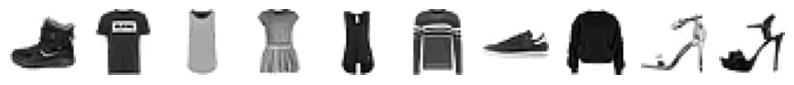

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')

plt.show()

print([train_target[i] for i in range(10)])

패션 MNIST의 타깃은 0~9까지의 숫자 레이블로 구성된다.

총 10개의 레이블이 존재. <br>
레이블 당 샘플의 개수를 확인

In [19]:
import numpy as np

print(np.unique(train_target, return_counts=True))



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


레이블마다 6000개의 샘플이 존재

**로지스틱 회귀로 패션 아이템 분류하기**

60000개를 한꺼번에 훈련하는 것보다 샘플을 하나씩 꺼내서 모델을 훈련하고자 한다. <br>
확률적 경사 하강법을 사용 <br>
표준화 전처리가 필요 <br>

패션 MNIST의 경우, 각 픽셀은 0에서 255 사이의 정숫값을 가진다. <br>
이런 이미지의 경우 보통 255로 나누어 0~1 사이의 값으로 정규화 한다. <br>
이는 표준화는 아니지만 양수 값으로 이루어진 이미지를 전처리할 때 널리 사용하는 방법이다.

In [20]:
#SGDClassifiet는 2차원 입력을 다루지 못한다.

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28) #28 * 28 이미지 크기에 맞게 지정하여 원본 데이터의 두 번째, 세 번째 차원이 1차원으로 합쳐진다.

print(train_scaled.shape)

(60000, 784)


In [21]:
#교차검증으로 모델을 평가
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier


sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))


0.8196000000000001


In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42) #검증 세트 나누기

print(train_scaled.shape, train_target.shape)


(48000, 784) (48000,)


In [25]:
#밀집층 생성
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, )) #10개의 뉴런, 뉴런의 출력에 적용할 함수는 soft_max(확률로 바꾸려고-다중 분류라서), 입력의 크기는 784

model = keras.Sequential(dense) #신경망 모델 생성

#손실 함수의 종류 지정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') #원핫 인코딩 하지 않고, 정수로 된 타깃값을 사용해 손실을 계산, 정확도 출력


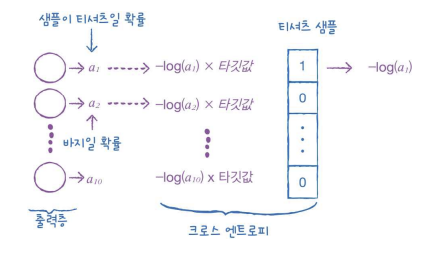

10개의 클래스에 대한 확률이 모두 출력된다. <br>
타깃에 해당하는 확률만 남기기 위해 나머지 확률에는 모두 0을 곱한다. <br>
타깃값을 해당 클래스만 1이고, 나머지는 모두 0인 배열로 만드는 것을 one-how encoding



In [24]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [26]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6052 - accuracy: 0.7944
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4748 - accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4506 - accuracy: 0.8472
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4380 - accuracy: 0.8515
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4287 - accuracy: 0.8550


In [27]:
#성능 확인
model.evaluate(val_scaled, val_target)


375/375 [==============================] - 1s 1ms/step - loss: 0.4441 - accuracy: 0.8438


[0.4440617263317108, 0.843833327293396]